![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [49]:
# importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# importando a base de dados

data_train = pd.read_csv('/content/drive/MyDrive/human-activity-train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/human-activity-test.csv')


In [52]:
# separando a base das varriáveis explicativas da variável alvo

y_train = data_train['Activity']
X_train = data_train.iloc[:,:-1]

y_test = data_test['Activity']
X_test = data_test.iloc[:,:-1]

## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [53]:
%%time

# Rode uma árvore de decisão com todas as variáveis, utilizando o ccp_alpha=0.001

arv = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001)

arv.fit(X_train, y_train)


CPU times: user 5.52 s, sys: 7.97 ms, total: 5.53 s
Wall time: 5.53 s


DecisionTreeClassifier(ccp_alpha=0.001, random_state=2360873)

In [54]:
# Avalie a acurácia nas bases de treinamento e teste

print('acurária na base treino:', arv.score(X_train, y_train))

print('acurária na base teste:', arv.score(X_test, y_test))

acurária na base treino: 0.9755168661588683
acurária na base teste: 0.8730912792670512


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [55]:
%%time

# Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente

pca = PCA(n_components=1).fit(X_train)

pca_train_1 = pca.transform(X_train)
pca_test_1 = pca.transform(X_test)


CPU times: user 639 ms, sys: 116 ms, total: 755 ms
Wall time: 408 ms


In [56]:
%%time

# Faça uma árvore de decisão com esta componente como variável explicativa.

arv_pca_1 = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001)

arv_pca_1.fit(pca_train_1, y_train)

CPU times: user 134 ms, sys: 94.7 ms, total: 229 ms
Wall time: 129 ms


DecisionTreeClassifier(ccp_alpha=0.001, random_state=2360873)

In [57]:
# Avalie a acurácia nas bases de treinamento e teste

print('acurária pca_1 na base treino:', arv_pca_1.score(pca_train_1, y_train))

print('acurária pca_1 na base teste:', arv_pca_1.score(pca_test_1, y_test))

acurária pca_1 na base treino: 0.558487486398259
acurária pca_1 na base teste: 0.026128266033254157


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [58]:
%%time

# Teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: [1, 2, 5, 10, 50]

quant_componentes = [1, 2, 5, 10, 50]

pca_train = []
pca_test = []

for quant in quant_componentes:

  pca = PCA(n_components=quant).fit(X_train)

  pca_train.append(pca.transform(X_train))
  pca_test.append(pca.transform(X_test))


CPU times: user 4.4 s, sys: 2.29 s, total: 6.7 s
Wall time: 4.86 s


In [59]:
%%time

# Avalie para cada uma delas: Acurácia nas bases de treino e teste (A)

score_train = []
score_test = []

for i in range(len(pca_train)):

  arv = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001)

  arv.fit(pca_train[i], y_train)

  score_train.append(arv.score(pca_train[i], y_train))
  score_test.append(arv.score(pca_test[i], y_test))



CPU times: user 1.3 s, sys: 25.7 ms, total: 1.32 s
Wall time: 1.38 s


In [60]:
# Avalie para cada uma delas: Acurácia nas bases de treino e teste (B)

data_scores = pd.DataFrame(np.array([quant_componentes, score_train, score_test]).transpose(), columns=['quant_componentes', 'score_treino', 'score_teste'])

data_scores

,quant_componentes,score_treino,score_teste
0,1.0,0.558487,0.026128
1,2.0,0.636561,0.376654
2,5.0,0.857998,0.727520
3,10.0,0.899075,0.812012
4,50.0,0.916077,0.822531


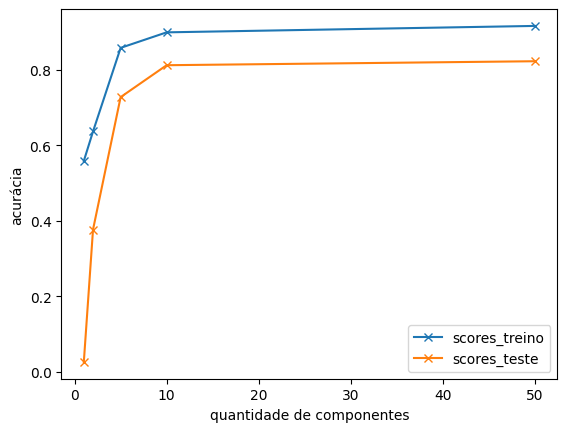

In [61]:
# Avalie para cada uma delas: Acurácia nas bases de treino e teste (C)

fig, ax = plt.subplots()

plt.plot(data_scores['quant_componentes'], data_scores['score_treino'], marker='x', label='scores_treino')
plt.plot(data_scores['quant_componentes'], data_scores['score_teste'], marker='x', label='scores_teste')

ax.set_xlabel("quantidade de componentes")
ax.set_ylabel("acurácia")

ax.legend()
plt.show()

## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

**O que aconteceu com a acurácia?**

*Acurácia do modelo é elevada significativamente, tanto na base de treino quando na de teste, conforme a quantidade de compontes aumenta até atingir a marca 10. A partir desta marca, o efeito da quantidade de componentes na permormance do modelo é muito pouco positivo*

**O que aconteceu com o tempo de processamento?**

*Notavelmente, o tempo de processo cresce à medida que mais variáveis explicativas são utilizadas na construção e execução dos modelos preditivos*